# Sandbox statistics

The goal of this notebook is to play with statistics in R and learn more about it. Examples and try out were done while cruising through the folowing statistics guide:
https://bookdown.org/mike/data_analysis/descriptive-stat.html

## Graphical Mesures

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt


The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt




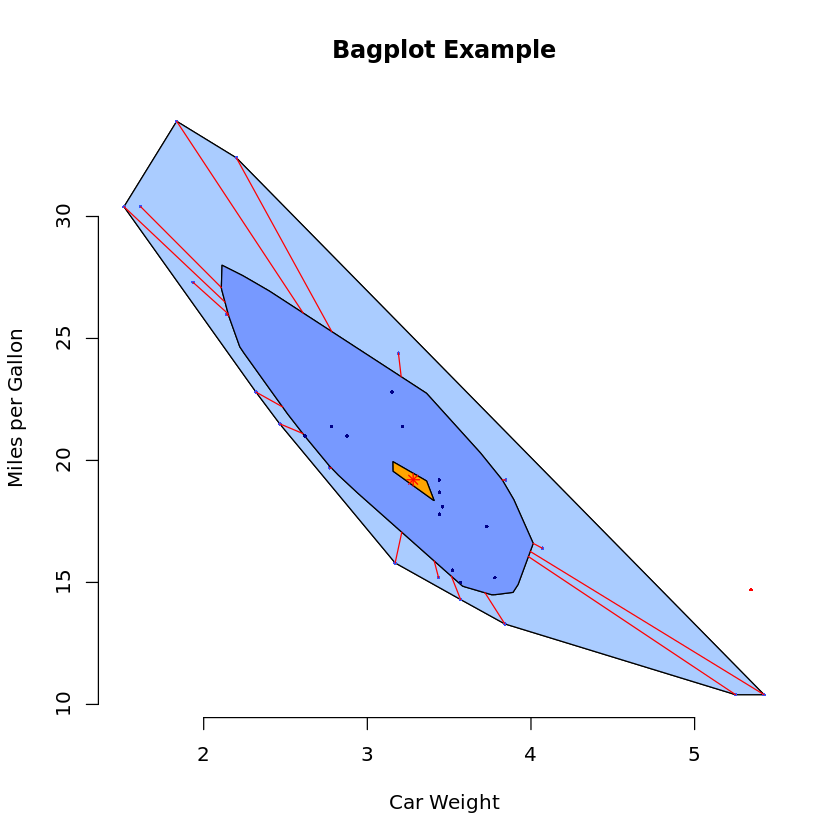

In [11]:
data = rnorm(100)

# Histogram
# hist(data,labels = T, col='grey', breaks = 12)

# Interactive histogram
# pacman::p_load("highcharter")
# hchart(data)

# Box-and-Whisker plot
# boxplot(len~supp*dose, data=ToothGrowth, notch=TRUE,
#         col=(c("gold","darkgreen")),
#         main="Tooth Growth", xlab="Suppliment and Dose")
# If notches differ -> medians differ

# Stem-and-Leaf Plots
# stem(data)

#Bagplot - A 2D Boxplot Extension
pacman::p_load(aplpack)
attach(mtcars)
bagplot(wt,mpg, xlab="Car Weight", ylab="Miles per Gallon",
main="Bagplot Example")

## Normality Assessment

Since Normal (Gaussian distribution has many applications, we tipically want/wish our data or our variable is normal. Hence, we have to assess the normality based on not only Numerical Mesures but also Graphical mesures.

Installing package into ‘/home/bbellanger/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Car’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘car’ ?”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Car’”
Warning message in pacman::p_load("Car"):
“Failed to install/load:
Car”


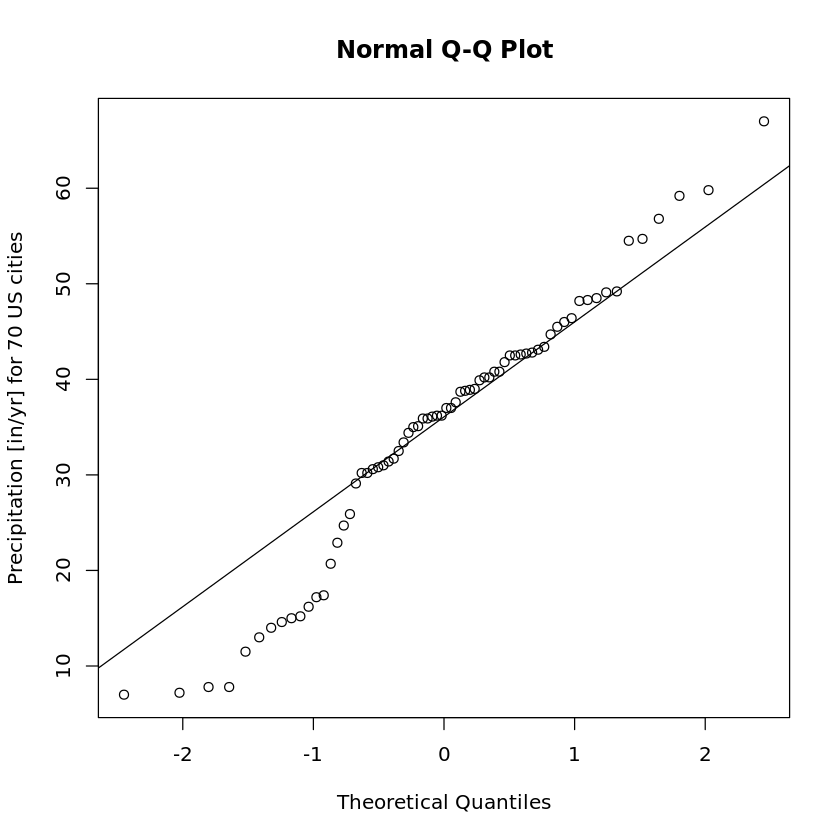

In [13]:
pacman::p_load("Car")
qqnorm(precip, ylab = "Precipitation [in/yr] for 70 US cities")
qqline(precip)

## Summary statistics
Sometimes it’s hard to tell whether your data follow the normal distribution by just looking at the graph. Hence, we often have to conduct statistical test to aid our decision. Common tests are

    Methods based on normal probability plot
        Correlation Coefficient with Normal Probability Plots
        Shapiro-Wilk Test

    Methods based on empirical cumulative distribution function
        Anderson-Darling Test
        Kolmogorov-Smirnov Test
        Cramer-von Mises Test
        Jarque–Bera Test


### Method based on probability plot

#### Correlation coefficient with Normal Probability Plots

When the correlation is 1, the plot is exactly linear and normality is assumed. The closer the correlation is to zero, the more confident we are to reject normality. Inference on W* needs to be based on special tables (Looney and Gulledge Jr 1985).

In [18]:
library("EnvStats")
gofTest(data,test="ppcc")$p.value #Probability Plot Correlation Coefficient

[1] 0.8702317

#### Shapiro-Wilk Test
Researchers tipically use this test to assess normality. (n < 2000) Under normality, W is close to 1, just like W*. Notice that the only difference between W and W* in the "Weights".

In [19]:
gofTest(data,test="sw")$p.value #Saphiro-Wilk is the default.

[1] 0.7510468

### Methods based on empirical cumulative distribution function

The empirical Cumulative Distribution Function is CDF:
Fn(t) = estimate of probability that an observation ≤ t = (number of observation ≤ t)/n
This method requires large sample sizes. However, it can apply to distributions other than the normal (Gaussian) one.

The empirical distribution function is an estimate of the cumulative distribution function that generated the points in the sample. It converges with probability 1 to that underlying distribution, according to the Glivenko–Cantelli theorem. A number of results exist to quantify the rate of convergence of the empirical distribution function to the underlying cumulative distribution function. 

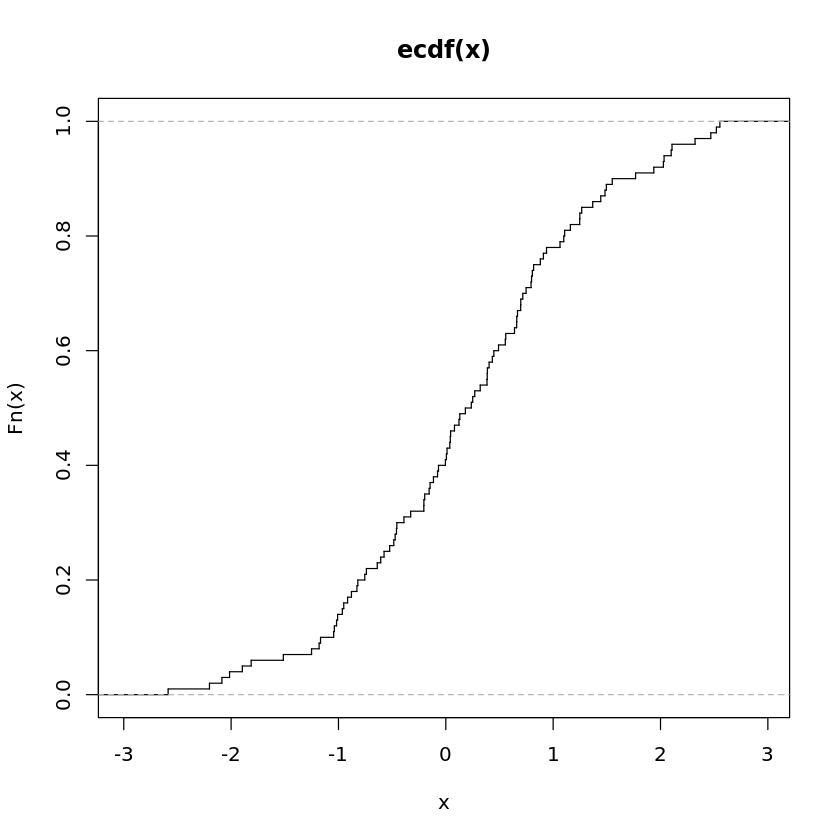

In [22]:
# Empirical CDF hand-code
plot.ecdf(data,verticals = T, do.points=F)

#### Anderson-Darling Test

Is a weight average of quared deviations (it weights small and large values of t more). It reject normal assumption when A² is too large. Evaluate the null hypothesis that the observations are ramdomly selected from a normal population basde on the critical value provided by (Marsaglia and Marsaglia 2004) and (Stephens 1974).

The test can be applied to other distributions: exponential, logistic, Gumbel, Extreme-value, Weibull: log(Weibull) = Gumbel, gamma, logistic, Cauchy, von Mises, Log-normal (two-parameter).

In [23]:
gofTest(data,test="ad")$p.value #Anderson-Darling

[1] 0.930101

#### Kolmogorov-Smirnov Test

Based on the largest absolution difference between empirical and expected cumulative distribution.

In [24]:
gofTest(data,test="ks")$p.value

Warning message in ksGofTest(x = c(0.69746444015345, -1.8956220268292, -2.01441790913298, :
“The standard Kolmogorov-Smirnov test is very conservative (Type I error smaller than assumed; high Type II error) for testing departures from the Normal distribution when you have to estimate the distribution parameters.

”


[1] 0.9984448

#### Cramer-von Mises Test

Based on the average squared discrepancy between the empirical distribution and a given theoretical distribution. Each discrepancy is weighted equally (unlike Anderson-Darling test weights end points more heaviliy).

In [27]:
gofTest(data,test="cvm")$p.value #Cramer-von Mises

[1] 0.9767754

# Bivariate statistics

## Two continuous

In [30]:
n = 100 # sample size
data = data.frame(A = sample(1:20, replace = TRUE, size = n),
                  B = sample(1:30, replace = TRUE, size = n))

# data

### Pearson Correlation
Good with linear relationship.

The Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the covariance of the two variables divided by the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations.

In [35]:
library(Hmisc)
rcorr(data$A, data$B, type="pearson")

     x    y
x 1.00 0.03
y 0.03 1.00

n= 100 


P
  x      y     
x        0.7383
y 0.7383       

## Spearman Correlation

It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. 

In [36]:
library(Hmisc)
rcorr(data$A, data$B, type="spearman")

     x    y
x 1.00 0.01
y 0.01 1.00

n= 100 


P
  x      y     
x        0.9094
y 0.9094       

In [37]:
# Categorical and continuous